In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import itertools

In [161]:
df = pd.read_csv('https://raw.githubusercontent.com/tisheedesh/Project/main/Data/data_processed.csv').drop(['Unnamed: 0'], axis=1)

Выведем базовую describe-таблицу количественных характеристик датасета:

In [162]:
df.describe()

,Примерный вес,Проба,Количество,Вес,Ширина кольца,Ширина,Высота,Номер страницы,Цена со скидкой,Цена без скидки
count,5081.000000,5081.000000,5081.000000,5081.000000,5081.000000,5081.000000,5081.000000,5081.000000,5.081000e+03,5.081000e+03
mean,2.284276,679.474513,8.997048,0.637668,2.460549,7.273189,3.373547,71.556583,4.298711e+04,9.967351e+04
std,1.317944,162.791681,21.055957,1.326276,1.418699,3.382117,1.353132,41.462401,1.026112e+05,2.302228e+05
min,0.170000,375.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.400000e+02,9.900000e+02
25%,1.430000,585.000000,1.000000,0.030000,2.000000,6.000000,3.000000,37.000000,4.050000e+03,9.490000e+03
50%,1.970000,585.000000,1.000000,0.201000,2.460293,7.272492,3.373794,70.000000,2.160000e+04,4.799000e+04
75%,2.760000,925.000000,7.000000,0.618000,2.460293,7.272492,3.373794,109.000000,3.960000e+04,9.299000e+04
max,14.600000,1000.000000,253.000000,18.705000,20.000000,38.000000,20.000000,146.000000,2.747250e+06,6.104990e+06


Интересно, что максимальное значение ширины кольца равно 110 мм. Разобравшись, мы выяснили, что на странице этого кольца действительно указано значение 110 мм - явная ошибка на сайте, т.к. ширина аналогичного кольца из другого металла составляет 10 мм, удалим его. На всякий случай прикрепляем ссылку на кольцо:

In [163]:
print('https://sokolov.ru/jewelry-catalog/product/' + df.loc[df['Ширина'] == df['Ширина'].max(), 'Артикул'].values[0])

https://sokolov.ru/jewelry-catalog/product/95010208


In [164]:
df.drop(df.loc[df['Ширина'] == df['Ширина'].max()].index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

### **Немного выбросов**

Посмотрим на все качественные характеристики, а именно определим, какие значения встречаются и в каком количестве колец, и удалим явные выбросы:

In [166]:
cat_feat = ['Для кого', 'Тип металла', 'Покрытие', 'Тип вставки', 'Форма вставки', 'Цвет']

In [167]:
# простите за этот ужасный вывод((
for c in cat_feat:
    display(df[c].value_counts())
    print()

Для кого
Для женщин                           4656
Для женщин, Для мужчин, Унисекс       227
Для мужчин                            164
Для детей                              17
Неизвестно                             10
Для женщин, Для мужчин, Для детей       6
Name: count, dtype: int64

Тип металла
Красное золото            1980
Родированное серебро      1132
Белое золото               831
Жёлтое золото              492
Комбинированное золото     288
Золочёное серебро          205
Чернёное серебро            93
Сталь                       25
Серебро                     18
Платина                     15
Золото                       1
Name: count, dtype: int64

Покрытие
Родирование                             2550
Неизвестно                              2003
Золочение                                151
Алмазная грань,  Родирование             119
Золочение,  Родирование                   81
Эмаль                                     76
Алмазная грань                            55
Родирование,  Эмаль                       11
Гравировка                                 9
Золочение,  Эмаль                          7
Золочение,  Родирование,  Эмаль            7
Гравировка,  Родирование                   6
Чернение                                   2
Гравировка,  Золочение                     1
Лазерная обработка,  Родирование           1
Алмазная грань,  Родирование,  Эмаль       1
Name: count, dtype: int64

Тип вставки
Фианит                             1720
Бриллиант (природный)              1386
Без вставок                         977
Топаз                               136
Эмаль                               112
Бриллиант выращенный                 71
Аметист                              55
Гранат                               46
Жемчуг натуральный                   40
Корунд                               39
Лондон топаз                         37
Агат                                 33
Ситалл                               32
Кристалл                             30
Раухтопаз                            29
Черный бриллиант                     29
Сапфир                               29
Кварц                                29
Коньячный бриллиант                  24
Изумруд натуральный                  24
Горный хрусталь                      21
Танзанит                             20
Жемчуг (синт.)                       18
Янтарь прессованный                  18
Наношпинель                 

Форма вставки
Круг           3414
Без вставок     977
Овал            138
Неизвестно      128
Груша            80
Маркиз           63
Октагон          62
Квадрат          55
Багет            39
Сердце           37
Триллион         34
Антик            24
Принцесса        14
Волна            10
Кушон             4
Шар               1
Name: count, dtype: int64

Цвет
Бесцветный     3134
Без вставок     977
Голубой         188
Неизвестно      136
Зелёный         136
Чёрный           92
Красный          78
Синий            75
Сиреневый        73
Белый            53
Коричневый       48
Розовый          38
Жёлтый           28
Коньячный        24
Name: count, dtype: int64

Как видно, большая часть качественных признаков имеет крайне редко встречающиеся значения на выборке (так, например, среди всех типов вставок рубеллит, стекло минеральное и другие встречаются только в одном кольце). Такие признаки нужно как-то обработать.

Учитывая размер выборки, нашим первоначальным exploratory-решением стало удаление колец, имеющих такие значения качественного признака `Тип вставки`, которые встречаются менее чем у 100 других колец (т.е. около 1-2% выборки). Такие кольца на данном этапе мы считаем выбросами. Значение в 100 единиц было взято на основе анализа наиболее насыщенной разнообразием качественной характиристики - `Тип вставки`.

По такому же принципу удалим те строки, где присутствуют значения признака `Форма вставки`, которые встречаются менее 20; строку, где `Тип металла` - золото; строку, где `Цвет` - красный (встречается всего по 1 разу).

In [168]:
df = df.loc[~df['Тип вставки'].isin(df['Тип вставки'].value_counts()[(df['Тип вставки'].value_counts() < 100)].index)]

In [169]:
df = df.loc[~df['Форма вставки'].isin(df['Форма вставки'].value_counts()[(df['Форма вставки'].value_counts() < 20)].index)]

In [170]:
df.drop(df.loc[(df['Тип металла'] == 'Золото') | (df['Цвет'] == 'Красный')].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [171]:
for c in cat_feat:
    display(df[c].value_counts())
    print()
df.shape

Для кого
Для женщин                           3922
Для женщин, Для мужчин, Унисекс       220
Для мужчин                            127
Для детей                              17
Неизвестно                              7
Для женщин, Для мужчин, Для детей       6
Name: count, dtype: int64

Тип металла
Красное золото            1592
Родированное серебро       967
Белое золото               729
Жёлтое золото              434
Комбинированное золото     272
Золочёное серебро          170
Чернёное серебро            85
Сталь                       25
Платина                     15
Серебро                     10
Name: count, dtype: int64

Покрытие
Родирование                             2330
Неизвестно                              1500
Алмазная грань,  Родирование             117
Золочение                                116
Эмаль                                     76
Золочение,  Родирование                   62
Алмазная грань                            53
Родирование,  Эмаль                       11
Гравировка                                 9
Золочение,  Эмаль                          7
Золочение,  Родирование,  Эмаль            7
Гравировка,  Родирование                   6
Чернение                                   2
Гравировка,  Золочение                     1
Лазерная обработка,  Родирование           1
Алмазная грань,  Родирование,  Эмаль       1
Name: count, dtype: int64

Тип вставки
Фианит                   1715
Бриллиант (природный)    1377
Без вставок               976
Топаз                     119
Эмаль                     112
Name: count, dtype: int64

Форма вставки
Круг           3024
Без вставок     976
Неизвестно      121
Сердце           30
Овал             29
Квадрат          28
Октагон          26
Груша            23
Багет            22
Маркиз           20
Name: count, dtype: int64

Цвет
Бесцветный     3026
Без вставок     976
Голубой         124
Неизвестно      112
Чёрный           25
Зелёный          15
Розовый           8
Жёлтый            8
Синий             5
Name: count, dtype: int64

(4299, 17)

Стало чуть лучше. Посмотрим на полученное описание значений кач. характеристик. Начнём с металлов:

Можно заметить, что серебро в выборке представлено в четырёх вариантах: `Родированное серебро`, `Золочёное серебро`, `Чернёное серебро ` и просто `Серебро`, при этом среди значений признака `Покрытие` встречаются такие, как `Родирование`, `Золочение` и `Чернение`, что наталкивает на следующую мысль: Серебро как тип металла на самом деле одно, просто из-за покрытия называется по-разному. Проверим это, проанализировав указанные покрытия для "нестандартного" серебра:

In [172]:
display(df.loc[df['Тип металла'] == 'Родированное серебро', 'Покрытие'].value_counts())
print()

display(df.loc[df['Тип металла'] == 'Золочёное серебро', 'Покрытие'].value_counts())
print()

display(df.loc[df['Тип металла'] == 'Чернёное серебро', 'Покрытие'].value_counts())
print()

Покрытие
Неизвестно                          526
Родирование                         318
Эмаль                                75
Золочение,  Родирование              16
Родирование,  Эмаль                  10
Алмазная грань                        7
Гравировка                            7
Золочение,  Родирование,  Эмаль       4
Золочение                             3
Лазерная обработка,  Родирование      1
Name: count, dtype: int64

Покрытие
Золочение                          103
Золочение,  Родирование             38
Неизвестно                          19
Золочение,  Эмаль                    5
Золочение,  Родирование,  Эмаль      3
Гравировка                           1
Гравировка,  Золочение               1
Name: count, dtype: int64

Покрытие
Неизвестно                              79
Золочение                                3
Чернение                                 2
Алмазная грань,  Родирование,  Эмаль     1
Name: count, dtype: int64

Так получилось, что `родированное серебро` не обязательно `родированное`, как и с остальными видами серебра. Грустно, но что поделать.

Получается, что нельзя преобразовать все типа серебра в один и классифицировать их по покрытию ☹.

Удалим явные выбросы в категории `Покрытие` (которые встречаются менее, чем в 11)

In [173]:
df = df.loc[~df['Покрытие'].isin(df['Покрытие'].value_counts()[(df['Покрытие'].value_counts() < 11)].index)]

In [175]:
# у нас осталось 4265 признаков, в целом, довольно много - супергуд
df.shape

(4265, 17)

### **Визуализация**

#### **Вещественные признаки**
___
Для начала посмотрим на вещественные признаки и зависимость целевой переменной от них.

Начнем с корреляционной таблицы

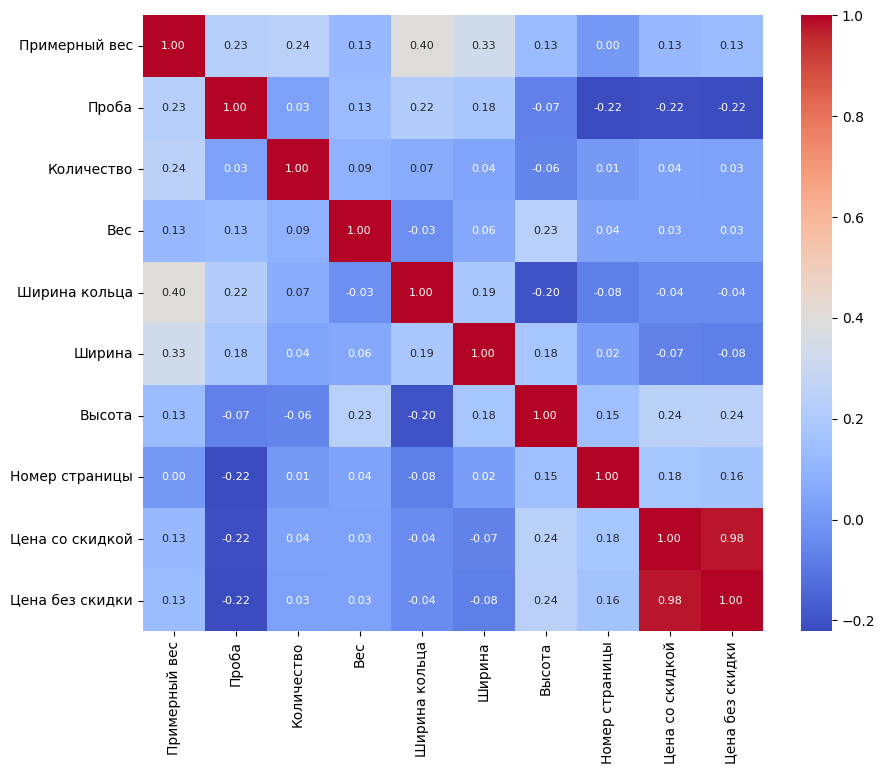

In [176]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt="0.2f", annot_kws={"size":8});

Высокая положительная корреляция наблюдается только у `цены со скидкой` и `цены без скидки`, что неудивительно. Больше удивляет то, что для всех остальных значений максимальное значение попарной корреляции равно 0.39, при этом корреляция признаков с ценой довольно слабая - максимум 0.24 по модулю. Будем разбираться.

Посмотрим на зависимость целевой переменной от каждого признака в отдельности:

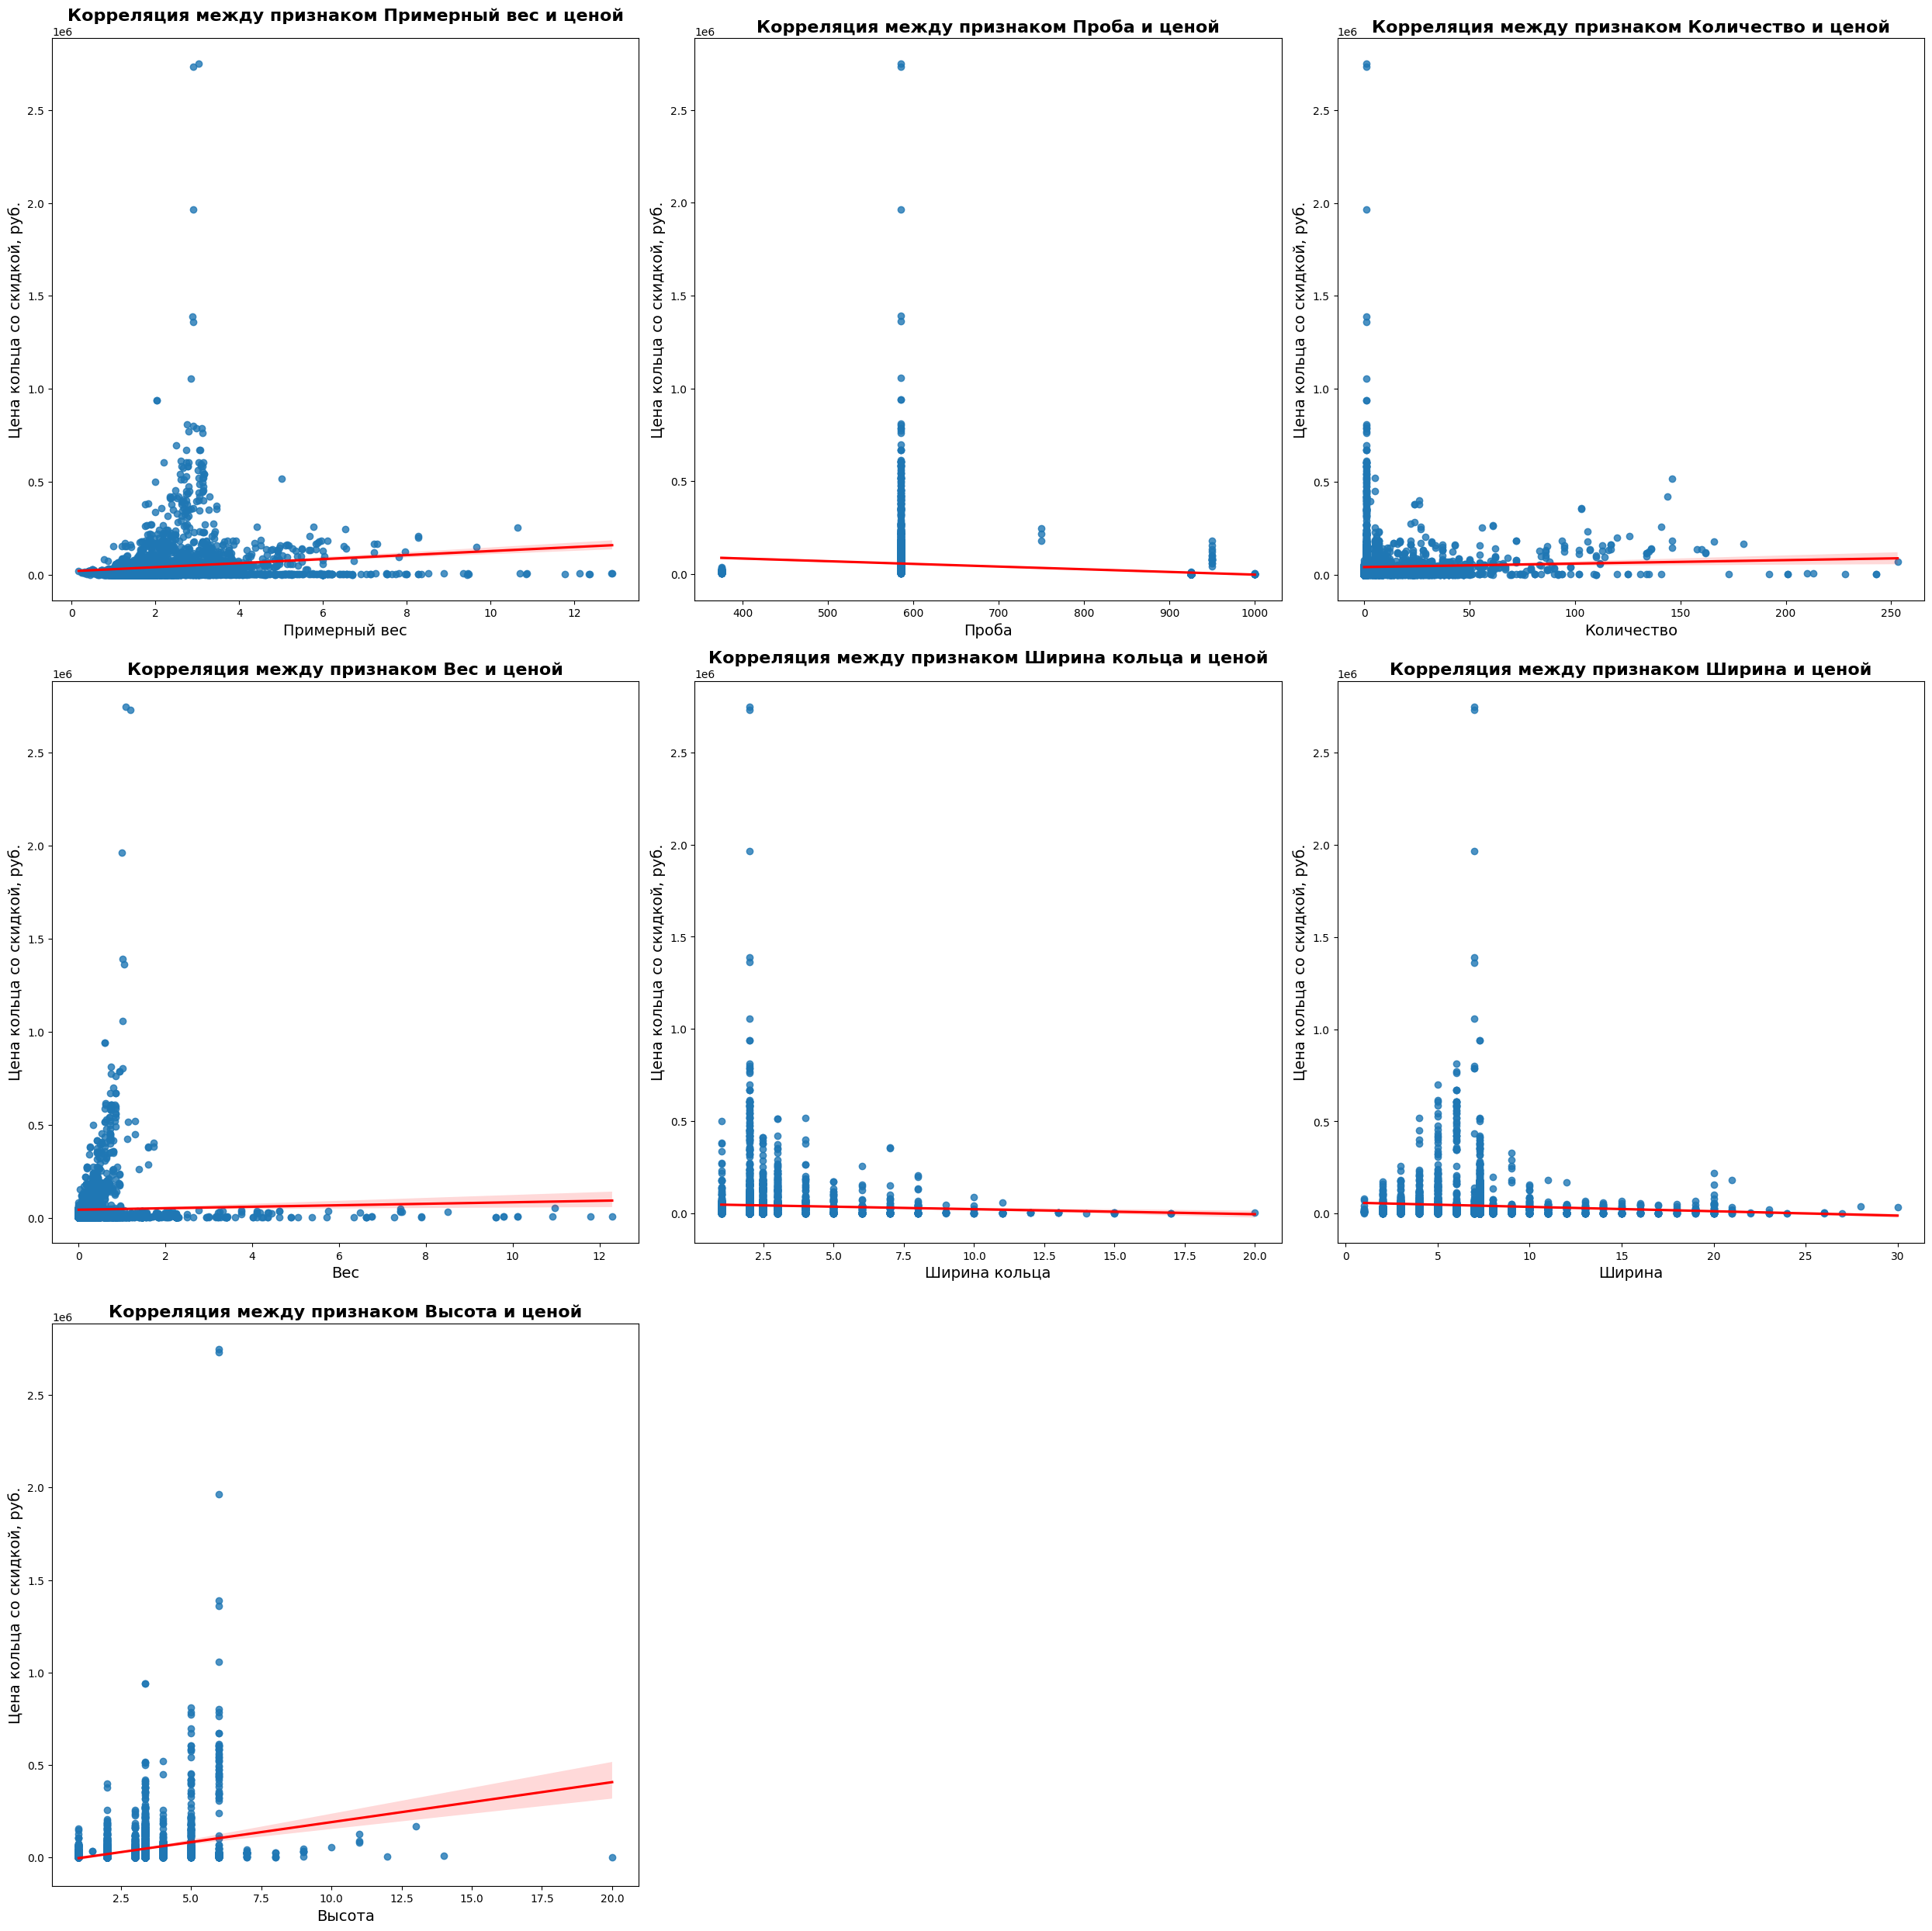

In [30]:
fig = plt.figure(figsize = (25, 25))
gr = gridspec.GridSpec(3, 3)
features = ['Примерный вес', 'Проба', 'Количество', 'Вес', 'Ширина кольца', 'Ширина', 'Высота']
for feature, grd in zip(features, itertools.product([0, 1, 2], [0, 1, 2])):
    ax = plt.subplot(gr[grd[0], grd[1]])
    ax = sns.regplot(df, y='Цена со скидкой', x=feature, line_kws={'color' : 'red'})
    ax.set_title(f'Корреляция между признаком {feature} и ценой', fontsize = 16, fontweight='heavy')
    ax.set_xlabel(feature, fontsize = 14)
    ax.set_ylabel('Цена кольца со скидкой, руб.', fontsize = 14)
fig.tight_layout()
plt.show()

По графикам видно, что у нас очень много (возможных) **выбросов**, которые могут немного искажать картину. Но в целом какой то четкой **линейной зависимости цены от количественных признаков не прослеживается**, что также подтверждает построенная ранее корреляционная таблица. Это может указывать на то, что цена изделия определяется другими факторами, например, качественными или теми, которые мы выкинули, либо на наличие сложных зависимостей, которые не выявляются линейной зависимостью.

В целом слабо положительно влияют на цену кольца `вес камней` (логично, так как больше ценятся камни с большим значением карат), `количество камней`, `вес самого кольца`, `высота вставки`.

Слабо отрицательно влияют `ширина кольца` и `ширина вставки`.

#### **Качественные признаки**
___

Посмотрим на распределение цены в зависимости от типа металла, типа вставки, для кого предназначены кольца.

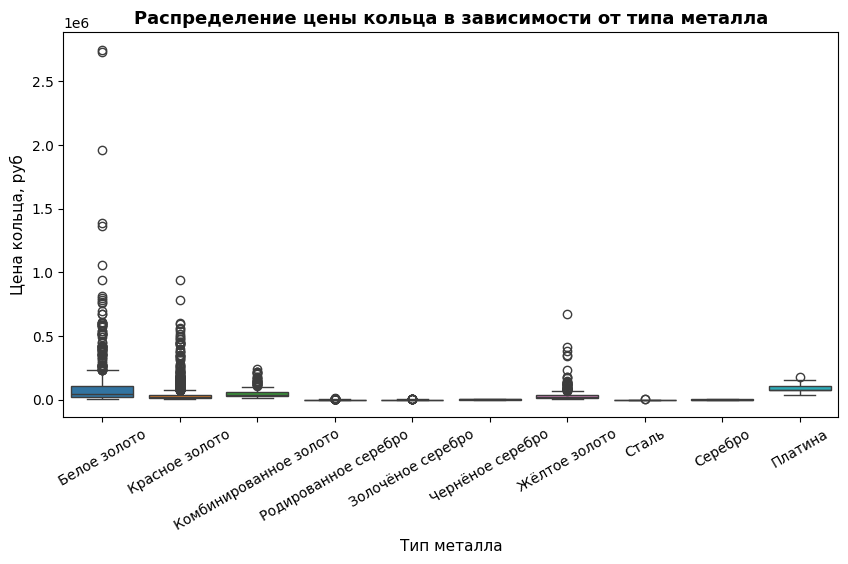

In [36]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(df, x='Тип металла', y='Цена со скидкой', hue='Тип металла')
plt.xticks(rotation=30)
plt.xlabel('Тип металла', fontsize=11)
plt.ylabel('Цена кольца, руб', fontsize=11)
plt.title('Распределение цены кольца в зависимости от типа металла', fontsize=13, fontweight='heavy')
plt.show()

График получается непрезентативным из-за выбросов. Уберем кольца, которые стоят больше 800 тысяч, чтобы можно было проинтерпретировать графики.

In [177]:
df2 = df.loc[df['Цена со скидкой'] < 800000]

In [178]:
rings_metall = ((df2['Тип металла'] == 'Родированное серебро') | (df2['Тип металла'] == 'Чернёное серебро') |
               (df2['Тип металла'] == 'Золочёное серебро') | (df2['Тип металла'] == 'Серебро') |
               (df2['Тип металла'] == 'Сталь'))

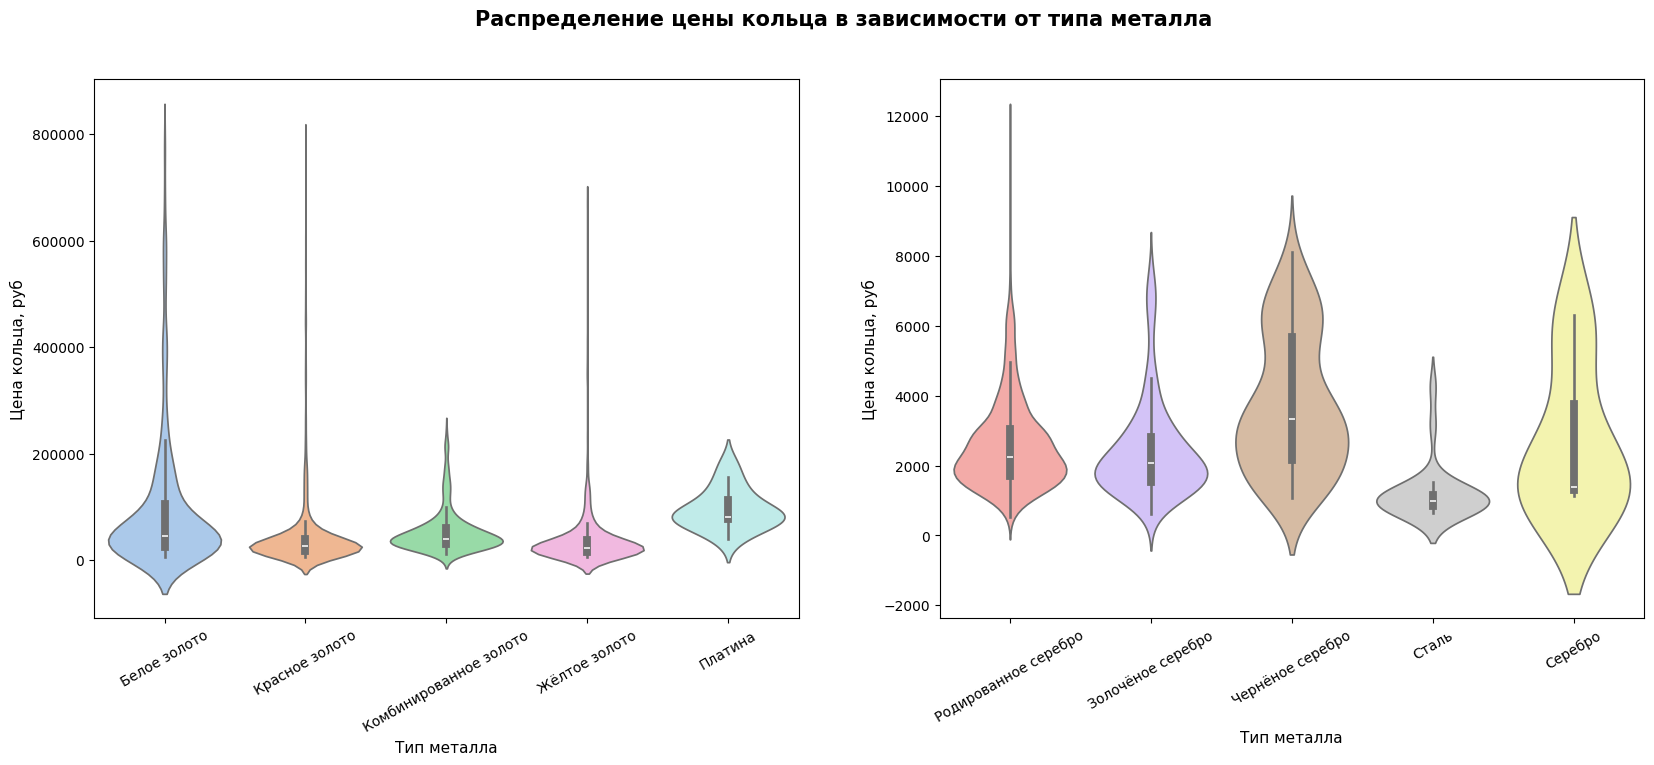

In [180]:
fig, ax = plt.subplots(figsize = (20,7), ncols=2)
sns.violinplot(x=df2.loc[~rings_metall, 'Тип металла'], y=df2['Цена со скидкой'], hue=df2['Тип металла'], ax=ax[0], palette='pastel')
ax[0].tick_params(axis='x', labelrotation=30)
ax[0].set_xlabel('Тип металла', fontsize=11)
ax[0].set_ylabel('Цена кольца, руб', fontsize=11)
ax[0].legend().remove()
sns.violinplot(x=df2.loc[rings_metall, 'Тип металла'], y=df2['Цена со скидкой'], hue=df2['Тип металла'], ax=ax[1], palette='pastel')
ax[1].tick_params(axis='x', labelrotation=30)
ax[1].set_xlabel('Тип металла', fontsize=11)
ax[1].set_ylabel('Цена кольца, руб', fontsize=11)
ax[1].legend().remove()
fig.suptitle('Распределение цены кольца в зависимости от типа металла', fontsize=15, fontweight='heavy')
plt.show()

На левом графике представлены кольца, сделанные скорее из **более дорогих металлов** (белое золото, красное золото, комбинированное золото, желтое золото, платина):

У **белого, красного и желтого золота** достаточно много выбросов, разброс цен сильно больше остальных. Но у всех видов золота медианная стоимость находится примерно на одинаковом уровне.

**Платина**: хотя распределение цен здесь более узкое, в среднем цены на изделия из данного металла дороже остальных.

Правый график: **менее дорогие металлы** (родированное серебро, золоченое серебро, чернёное серебро, сталь, серебро):

**Родированное и золоченое серебро** похожи между собой, только у родированного больше разброс цен.

**Чернёное серебро и просто серебро** имеют похожее распределение цен, но у колец из черненого серебра медианная стоимость выше.

**Сталь** имеет самое узкое распределение цен из всех представленных, большинство изделий стоят значительно меньше 1 тысячи рублей.

Наибольший разброс цен наблюдается у **белого золота**, что может указывать на высокую ценность и более разнообразные кольца (возможно из-за того, что оно пользуется большим спросом).

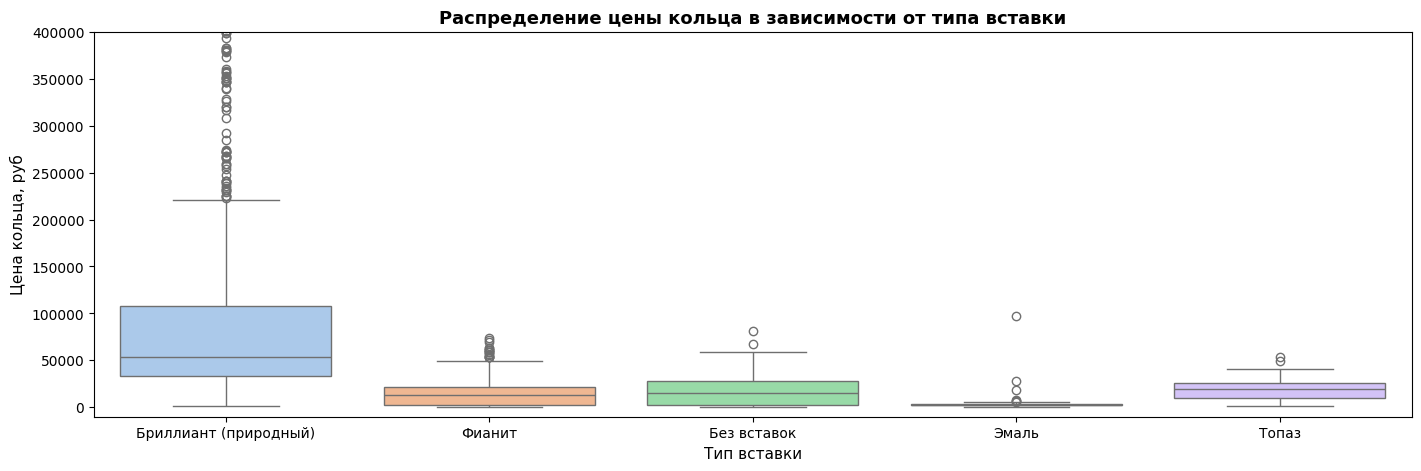

In [183]:
fig, ax = plt.subplots(figsize = (17, 5))
sns.boxplot(df2, x='Тип вставки', y='Цена со скидкой', hue='Тип вставки', palette='pastel')
ax.set(ylim=(-10000, 400000))
plt.xlabel('Тип вставки', fontsize=11)
plt.ylabel('Цена кольца, руб', fontsize=11)
plt.title('Распределение цены кольца в зависимости от типа вставки', fontsize=13, fontweight='heavy')
plt.show()

Кольца с `бриллиантами` имеют самый широкий диапазон цен, помимо этого медианная цена находится на самом высоком уровне. Также часто бриллианты идут в кольцах из белого золота, что может быть причиной высокой стоимости колец из белого золота

Цены на кольца с `фианитом`, `топазом` и в прицнипе на кольца `без вставок` значительно ниже, большинство изделий находится в пределах до 20 тысяч рублей.

Кольца с `эмалью` имеют самую низкую цену, большинство из них стоит менее 10 тысяч рублей.

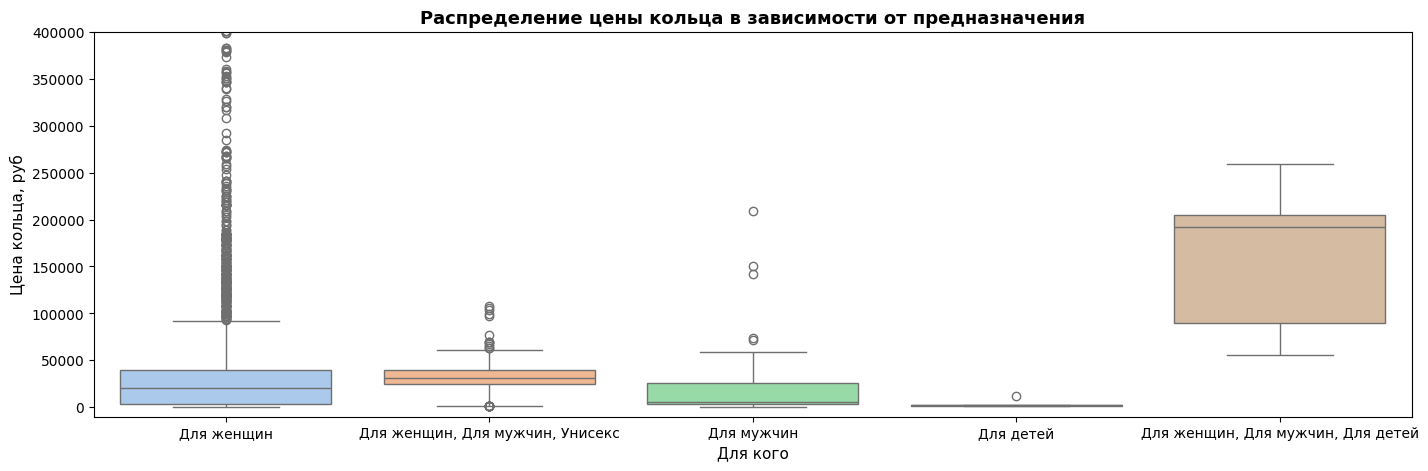

In [184]:
fig, ax = plt.subplots(figsize = (17, 5))
sns.boxplot(x=df2.loc[df2['Для кого'] != 'Неизвестно', 'Для кого'], y=df2['Цена со скидкой'], hue=df2['Для кого'], palette='pastel')
ax.set(ylim=(-10000, 400000))
plt.xlabel('Для кого', fontsize=11)
plt.ylabel('Цена кольца, руб', fontsize=11)
plt.title('Распределение цены кольца в зависимости от предназначения', fontsize=13, fontweight='heavy')
plt.legend().remove()
plt.show()

`Для женщин` ассортимент колец в целом больше других, соответственно и разброс цен тоже выше. `Для мужчин` колец меньше в принципе, плюс к этому медианная цена ниже. `Для детей` самые дешевые кольца, что делает их наиболее доступными.

У колец `унисекс` цены распределены равномерно, но диапазон менее широкий.

`Для женщин, для мужчин, для детей`: эти кольца имеют широкий диапазон цен, и их медианная цена выше всех остальных.

___
Пока мы просматривали некоторые кольца, у нас возникла гипотеза (которую мы позже проверим статистически), что кольца для женщин весят меньше, чем кольца для мужчин. Посмотрим это на графиках:

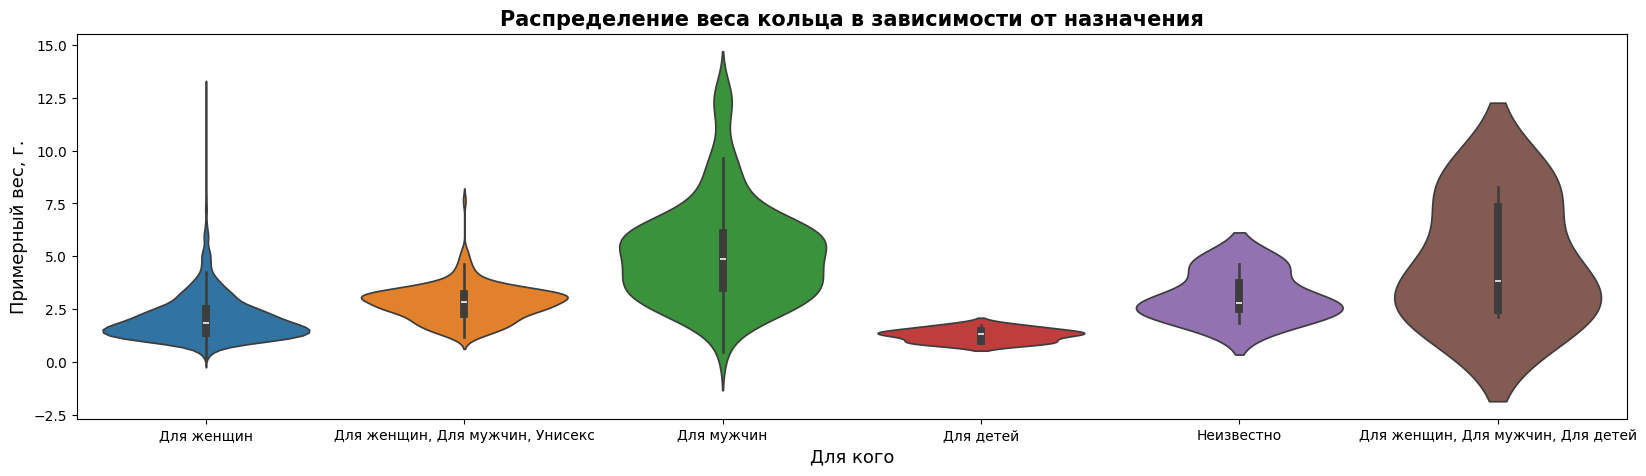

In [156]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.violinplot(df, x='Для кого', y='Примерный вес', hue='Для кого')
plt.xlabel('Для кого', fontsize=13)
plt.ylabel('Примерный вес, г.', fontsize=13)
plt.title('Распределение веса кольца в зависимости от назначения', fontsize=15, fontweight='heavy')
plt.show()

Если смотреть по графику, то в среднем кольца для мужчин и правда кажется тяжелее остальных, но возможно мужские кольца состоят из тяжелых металлов и поэтому массивнее.

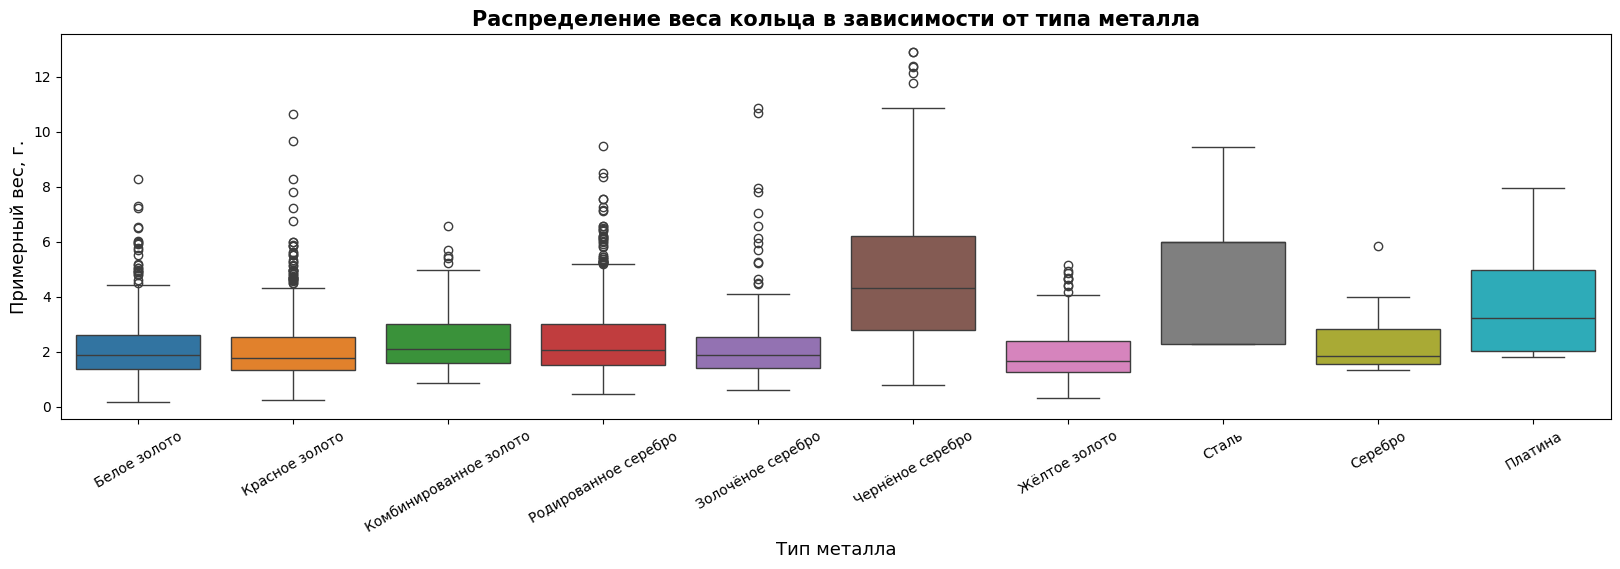

In [157]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.boxplot(df, x='Тип металла', y='Примерный вес', hue='Тип металла')
plt.xticks(rotation=30)
plt.xlabel('Тип металла', fontsize=13)
plt.ylabel('Примерный вес, г.', fontsize=13)
plt.title('Распределение веса кольца в зависимости от типа металла', fontsize=15, fontweight='heavy')
plt.show()

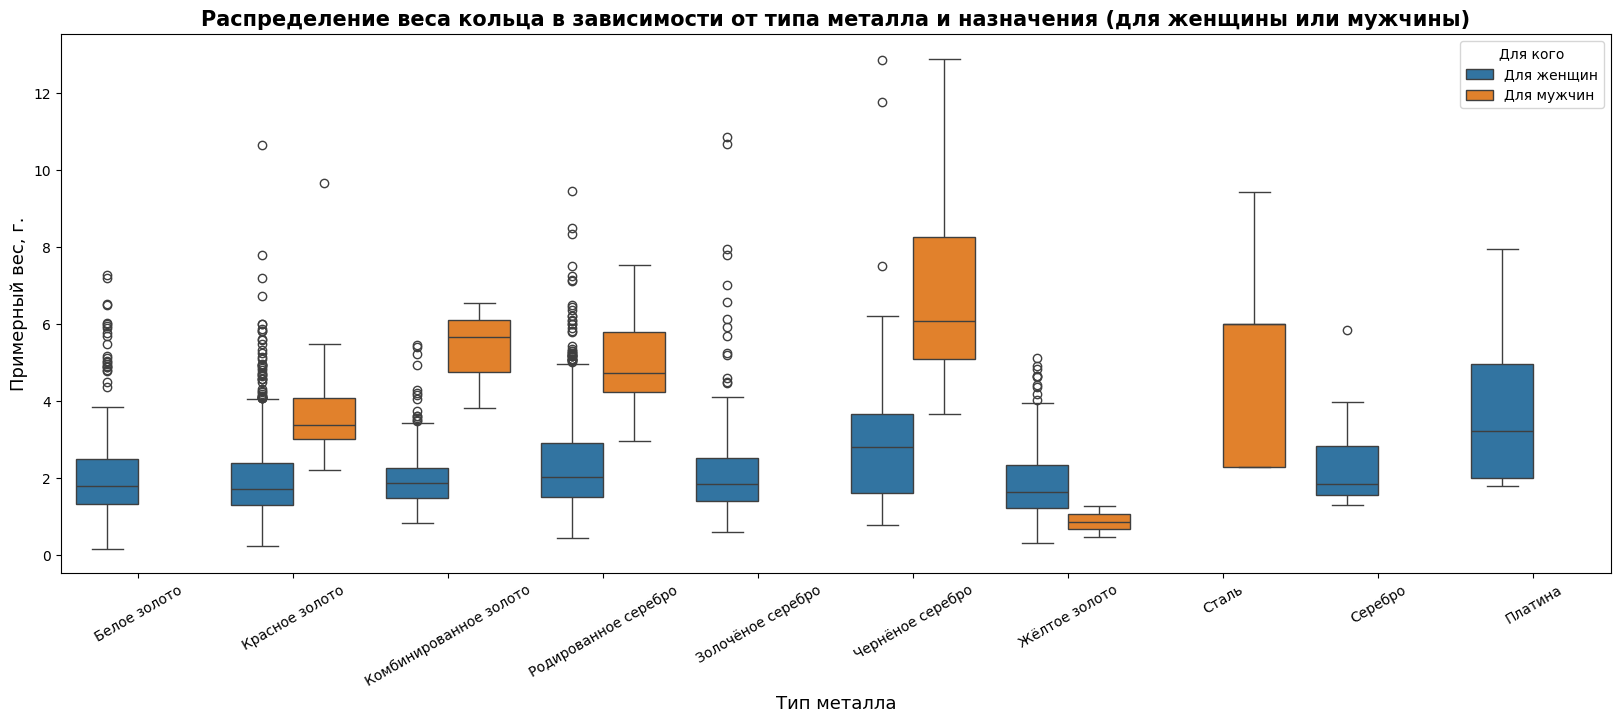

In [159]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.boxplot(df.loc[(df['Для кого'] == 'Для мужчин') | (df['Для кого'] == 'Для женщин')], x='Тип металла', y='Примерный вес', hue='Для кого')
plt.xticks(rotation=30)
plt.xlabel('Тип металла', fontsize=13)
plt.ylabel('Примерный вес, г.', fontsize=13)
plt.title('Распределение веса кольца в зависимости от типа металла и назначения (для женщины или мужчины)', fontsize=15, fontweight='heavy')
plt.show()

Все таки мужские кольца в целом, независимо от типа металла, тяжелее женских (исключение составляет жёлтое золото). Но сравним мы средний вес женских и мужских колец в разделе проверки гипотез.

In [27]:
df.to_csv('data_edaed.csv')